In [1]:
import pandas as pd

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv("housing.data", delim_whitespace=True, header=None, names=column_names)


In [4]:
new_column_names = {
    "CRIM": "crime_rate",
    "ZN": "residential_zone",
    "INDUS": "non_retail_business",
    "CHAS": "charles_river",
    "NOX": "nox_concentration",
    "RM": "rooms_per_dwelling",
    "AGE": "age_of_houses",
    "DIS": "distance_to_employment",
    "RAD": "accessibility_to_highways",
    "TAX": "property_tax_rate",
    "PTRATIO": "pupil_teacher_ratio",
    "B": "black_population",
    "LSTAT": "lower_status_population",
    "MEDV": "median_home_value"
}

data = data.rename(columns=new_column_names)

data.head()

,crime_rate,residential_zone,non_retail_business,charles_river,nox_concentration,rooms_per_dwelling,age_of_houses,distance_to_employment,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,black_population,lower_status_population,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


       crime_rate  residential_zone  non_retail_business  charles_river   
count  506.000000        506.000000           506.000000     506.000000  \
mean     3.613524         11.363636            11.136779       0.069170   
std      8.601545         23.322453             6.860353       0.253994   
min      0.006320          0.000000             0.460000       0.000000   
25%      0.082045          0.000000             5.190000       0.000000   
50%      0.256510          0.000000             9.690000       0.000000   
75%      3.677083         12.500000            18.100000       0.000000   
max     88.976200        100.000000            27.740000       1.000000   

       nox_concentration  rooms_per_dwelling  age_of_houses   
count         506.000000          506.000000     506.000000  \
mean            0.554695            6.284634      68.574901   
std             0.115878            0.702617      28.148861   
min             0.385000            3.561000       2.900000   
25%      

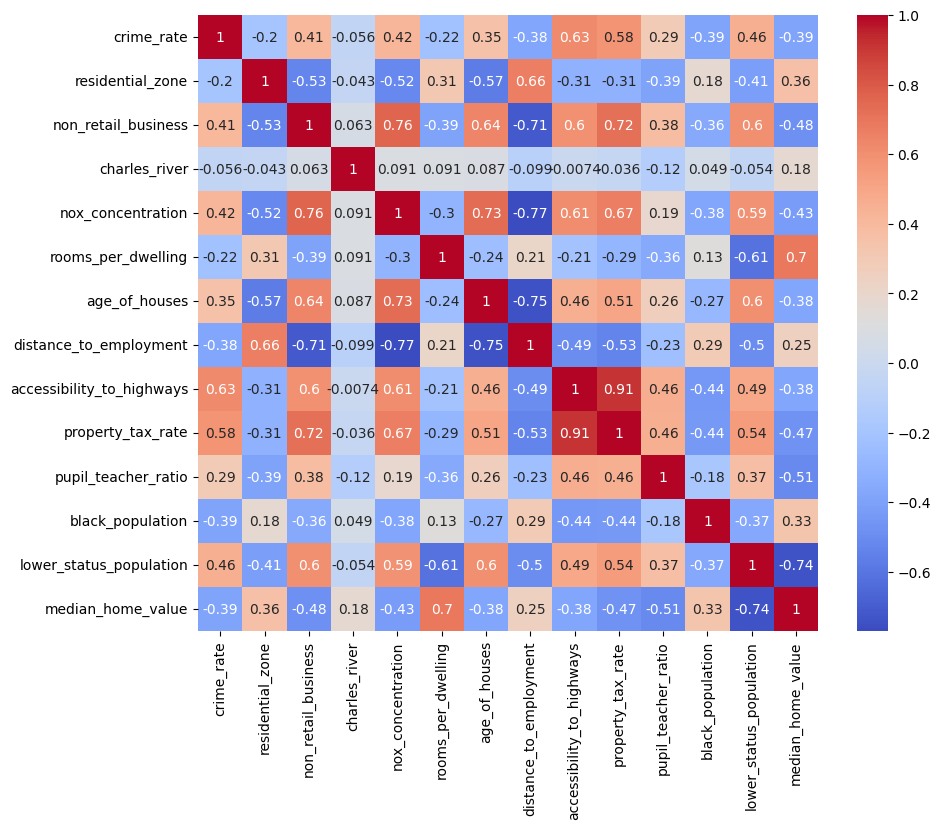

In [6]:
# Basic statistics
print(data.describe())

# Correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [7]:
print(data.isnull().sum())

crime_rate                   0
residential_zone             0
non_retail_business          0
charles_river                0
nox_concentration            0
rooms_per_dwelling           0
age_of_houses                0
distance_to_employment       0
accessibility_to_highways    0
property_tax_rate            0
pupil_teacher_ratio          0
black_population             0
lower_status_population      0
median_home_value            0
dtype: int64


Since all the variables are continous in our dataset, we would standardize our independent variables to avoid poor perfomance of our models in later analysis. 

In [10]:
from sklearn.preprocessing import StandardScaler

X = data.drop("median_home_value", axis=1)
y = data["median_home_value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


some descriptive analysis of target variable and its relationship with other variables 

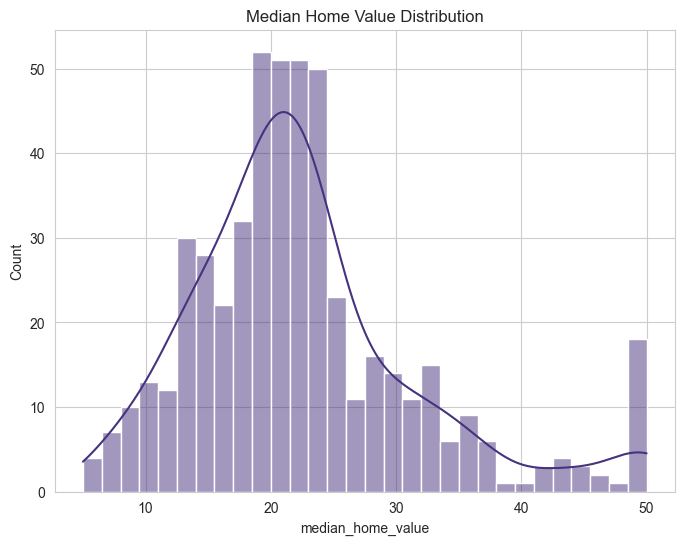

In [17]:
# frequency distributin of target

plt.figure(figsize=(8, 6))
sns.histplot(data['median_home_value'], bins=30, kde=True)
plt.title('Median Home Value Distribution')
plt.show()



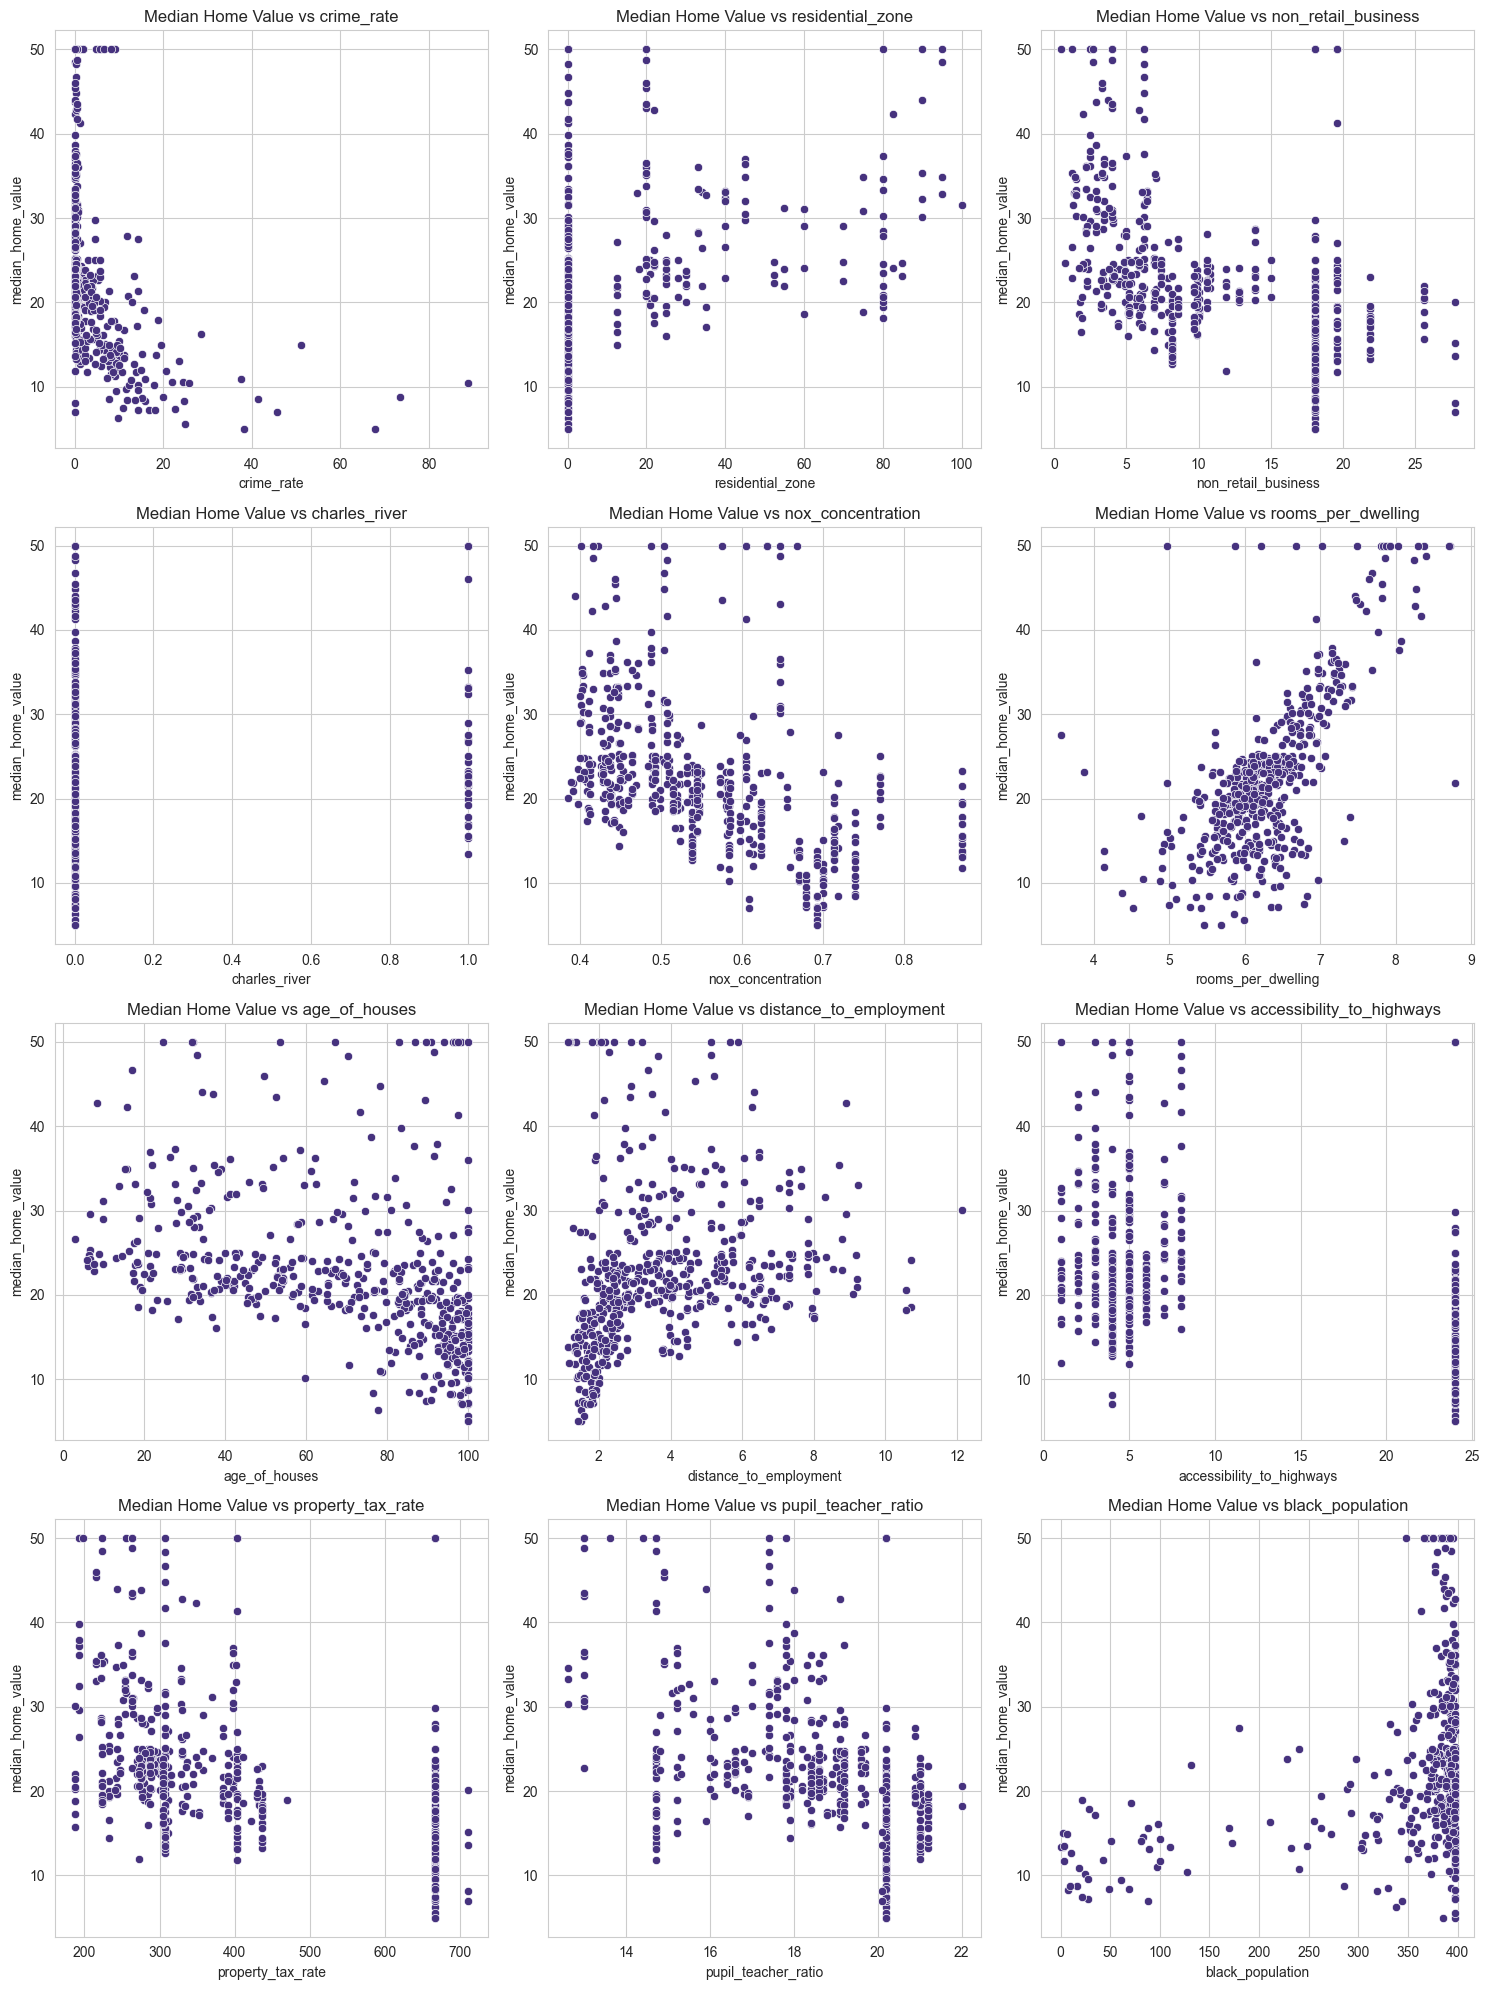

In [16]:

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
for i, ax in enumerate(axs.flatten()):
    if i < len(X.columns):
        column_name = X.columns[i]
        sns.scatterplot(data=data, x=column_name, y='median_home_value', ax=ax)
        ax.set_title(f'Median Home Value vs {column_name}')
plt.tight_layout()
plt.show()



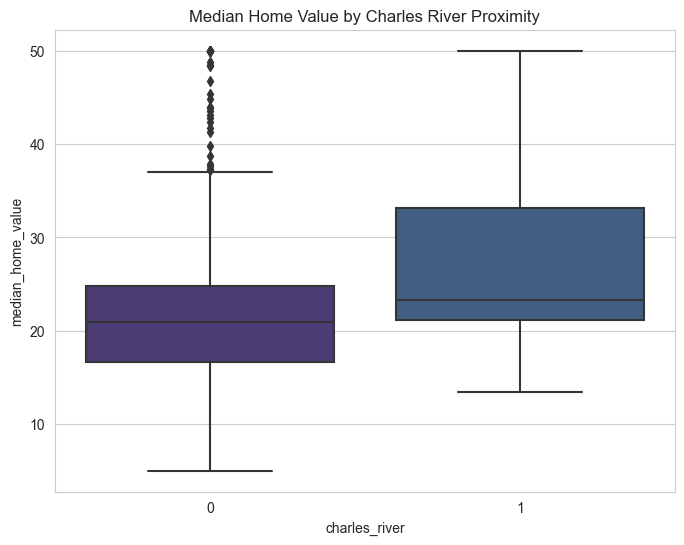

In [18]:
# catagorical variable relationship

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='charles_river', y='median_home_value')
plt.title('Median Home Value by Charles River Proximity')
plt.show()


let's test some more interesting individual relationships

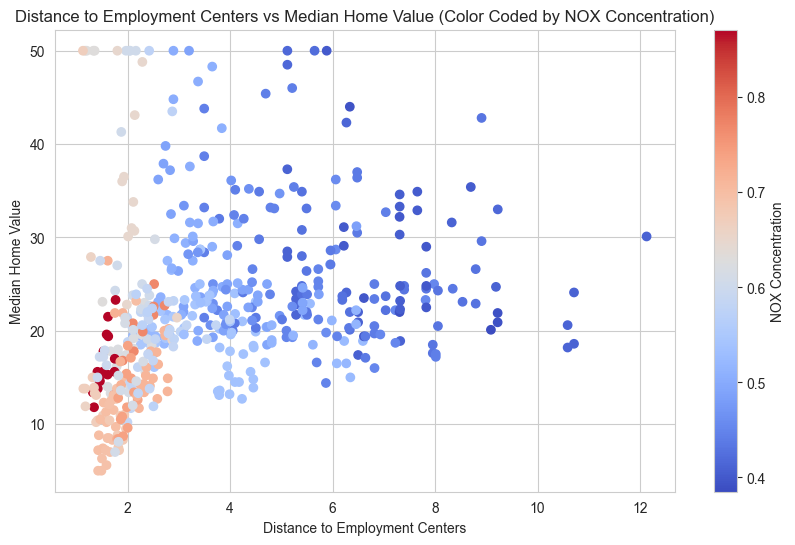

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data["distance_to_employment"], data["median_home_value"], c=data["nox_concentration"], cmap="coolwarm")
plt.colorbar(scatter, label="NOX Concentration")
plt.xlabel("Distance to Employment Centers")
plt.ylabel("Median Home Value")
plt.title("Distance to Employment Centers vs Median Home Value (Color Coded by NOX Concentration)")
plt.show()



The points on the plot are color-coded based on their nitric oxide (NOX) concentration levels, with a color gradient ranging from cooler colors (blue) for low concentrations to warmer colors (red) for high concentrations. 

Observations:
- There is a general trend of higher median home values as the distance to employment centers increases.
- Nitric oxide concentrations tend to be higher in areas with a shorter distance to employment centers


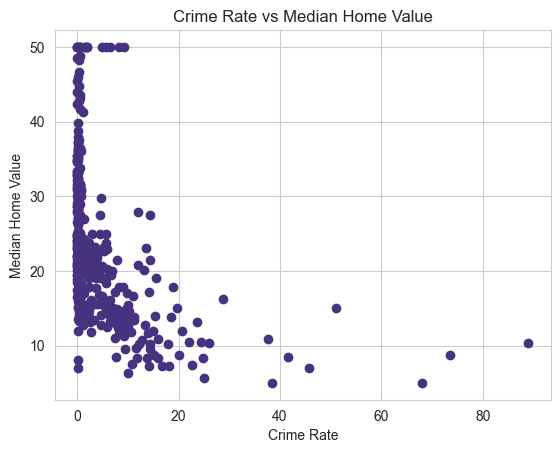

In [23]:
# relationship between crime rate and median home value

plt.scatter(data['crime_rate'], data['median_home_value'])
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Value')
plt.title('Crime Rate vs Median Home Value')
plt.show()




Let's now fit different models to our data and see if we find somethign interesting..

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test) # prediction on train
y_pred_lr = lr_model.predict(X_test) # prediction on test


# R-Squared Test
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")




Linear Regression - MSE: 21.51744423117726, R2: 0.7112260057484925


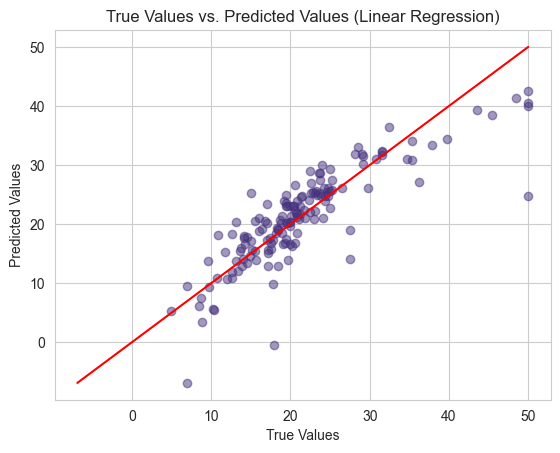

In [36]:

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Linear Regression)")
min_val = min(min(y_test), min(y_pred_lr))
max_val = max(max(y_test), max(y_pred_lr))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()


In [38]:
# Decision tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [39]:
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - MSE:", mse_dt)
print("Decision Tree - R2:", r2_dt)


Decision Tree - MSE: 11.588026315789474
Decision Tree - R2: 0.8444833592340152


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)


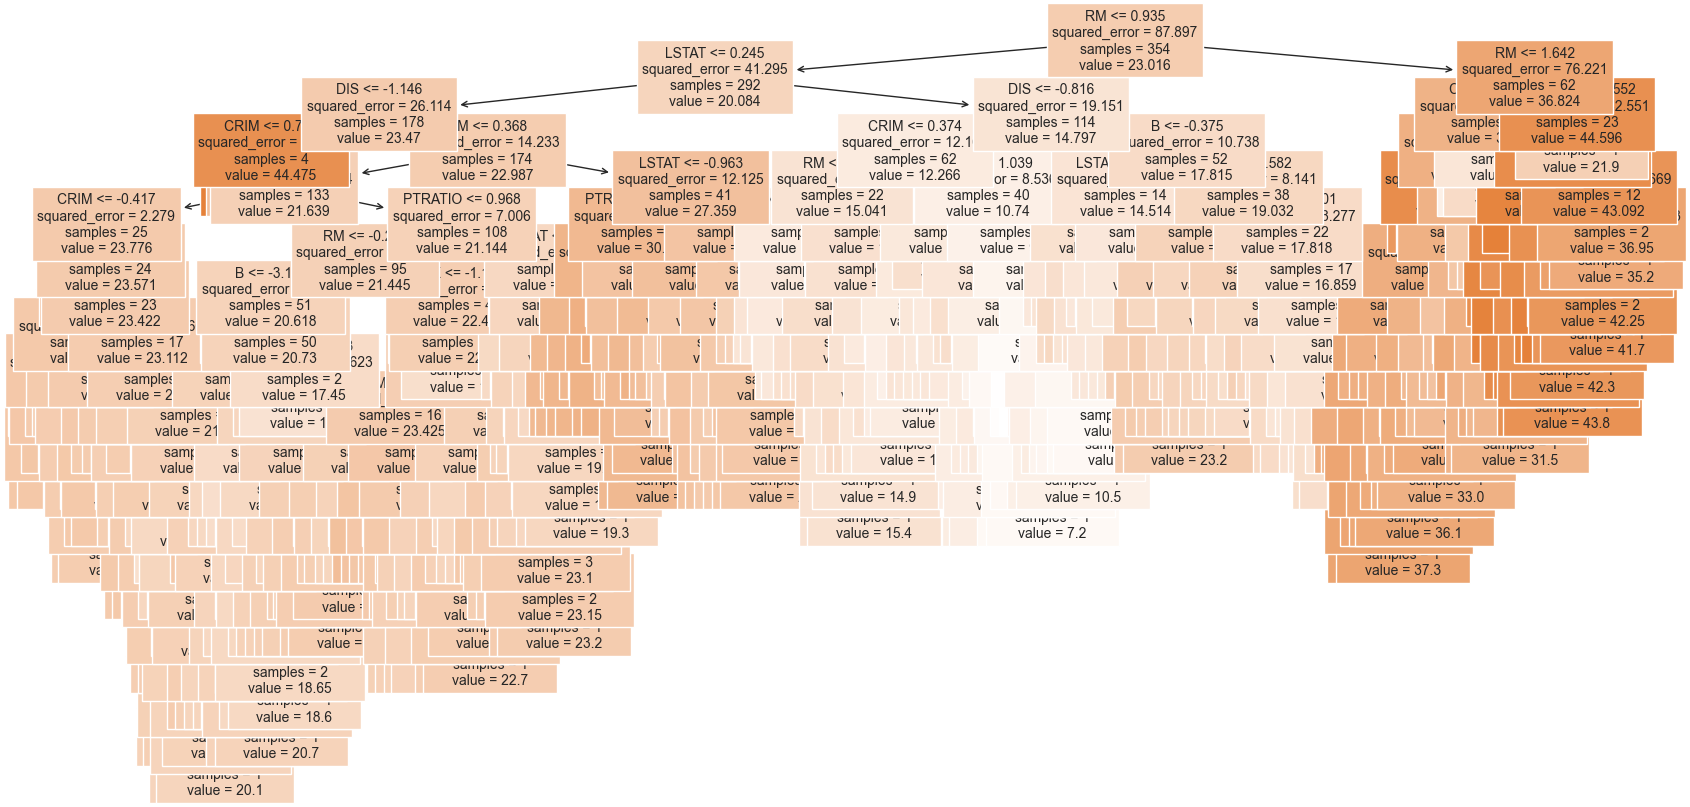

In [41]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=column_names[:-1], filled=True, fontsize=10)
plt.show()


There are way too many variables. I will use Recursive feature elimination to shorten the list of predictors. 

"RFE is a method to find the most important features in your data for a given model. It works by repeatedly fitting the model and removing the least important feature each time. It keeps doing this until it reaches the number of features you want. RFE uses the importance scores given by the model to decide which features are more important. The result of RFE is a list of features ranked by their importance, with lower rankings meaning higher importance."

In [50]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeRegressor

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# feature importances from the decision tree model
importances = rfe.estimator_.feature_importances_

# DataFrame with feature names, their RFE rankings, and their importances
feature_rankings = pd.DataFrame({'Feature': column_names[:-1], 'Ranking': rfe.ranking_})

selected_features = feature_rankings[feature_rankings['Ranking'] == 1]

#importances to the selected features DataFrame
selected_features['Importance'] = importances

# Print the selected features along with their importances
print("Selected features and their importances:")
print(selected_features)






Selected features and their importances:
   Feature  Ranking  Importance
0     CRIM        1    0.049380
5       RM        1    0.583583
6      AGE        1    0.017542
7      DIS        1    0.117995
12   LSTAT        1    0.231499


/var/folders/dw/g3ypc2555pzgdfgppj2cjj8w0000gn/T/ipykernel_20579/344726377.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Importance'] = importances


     True Value  Predicted Value (Initial)   
173        23.6                       21.6  \
274        32.4                       33.1   
491        13.6                       13.3   
72         22.8                       24.8   
452        16.1                       19.4   
76         20.0                       18.5   
316        17.8                       22.5   
140        14.0                       14.3   
471        19.6                       23.0   
500        16.8                       20.1   

     Predicted Value (Selected Features)  Error (Initial)   
173                                 18.6              2.0  \
274                                 30.1              0.7   
491                                 13.3              0.3   
72                                  27.0              2.0   
452                                 14.1              3.3   
76                                  21.0              1.5   
316                                 19.4              4.7   
140  

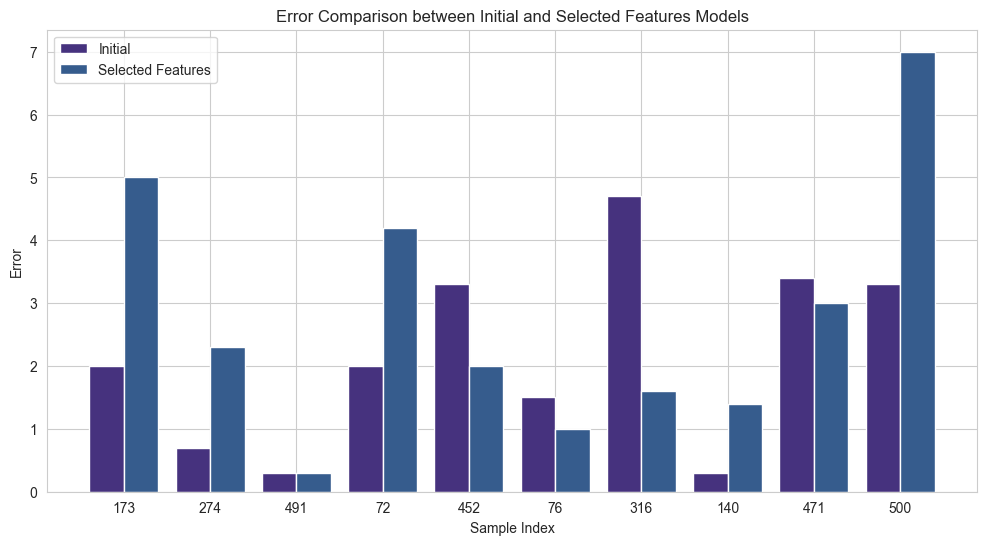

In [54]:
# new training and testing sets with only the selected features

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# new model 
dt.fit(X_train_selected, y_train)
y_pred_selected = dt.predict(X_test_selected)

# model evaluation
comparison_df['Error (Initial)'] = abs(comparison_df['True Value'] - comparison_df['Predicted Value (Initial)'])
comparison_df['Error (Selected Features)'] = abs(comparison_df['True Value'] - comparison_df['Predicted Value (Selected Features)'])

print(comparison_df.head(10))

# bar plot to visualize the errors
plt.figure(figsize=(12, 6))
index = np.arange(len(comparison_df.head(10)))
bar_width = 0.4

rects1 = plt.bar(index, comparison_df['Error (Initial)'].head(10), bar_width, label='Initial')
rects2 = plt.bar(index + bar_width, comparison_df['Error (Selected Features)'].head(10), bar_width, label='Selected Features')

plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.title('Error Comparison between Initial and Selected Features Models')
plt.xticks(index + bar_width / 2, comparison_df.index[:10])
plt.legend()

plt.show()



In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error for the initial model and the model with selected features
mse_initial = mean_squared_error(y_test, y_pred)
mse_selected = mean_squared_error(y_test, y_pred_selected)

# Calculate the R-squared for the initial model and the model with selected features
r2_initial = r2_score(y_test, y_pred)
r2_selected = r2_score(y_test, y_pred_selected)

# Print the results
print("Initial Model - MSE:", mse_initial, ", R2:", r2_initial)
print("Selected Features Model - MSE:", mse_selected, ", R2:", r2_selected)


Initial Model - MSE: 8.131551535841314 , R2: 0.8908708398990747
Selected Features Model - MSE: 25.42592105263158 , R2: 0.658772449877975
